## Load FATAL data

In [1]:
%run ./FATAL_data_count.ipynb

[ContentFile(path="D2-documentation"), ContentFile(path="DATA"), ContentFile(path="README.md"), ContentFile(path="scripts")]
ContentFile(path="D2-documentation")
ContentFile(path="DATA")
ContentFile(path="README.md")
ContentFile(path="scripts")
37
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/SOC_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/FATAL_all.csv




## Select Generic Database to work with

In [2]:
genericDB_files_dict = {}

desired_file_prefix = "NF_LOS"  # "NF_AGE_14to15_all.csv"

## Create above database dictionary

In [3]:
# pull in the data

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (desired_file_prefix in url):
        print(url)
        
        name = url.split("/")[-1].split("_all")[0]
        print(name)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        
        #print(source)
        decoded_data = source.decode("utf-8")
        genericDB_files_dict.setdefault(name, []).append(decoded_data)
        #genericDB.append(decoded_data)   

#print(genericDB_files_dict)

https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_1to5yr_all.csv
NF_LOS_1to5yr
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_3to11mos_all.csv
NF_LOS_3to11mos
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_5plus_all.csv
NF_LOS_5plus
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_NR_all.csv
NF_LOS_NR
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_ltg3mos_all.csv
NF_LOS_ltg3mos


In [4]:
# Create a dictionary of soc_codes
#
genericDB_dict = {}


# Create Dictionary of SOC codes
#
for db in genericDB_files_dict.keys():
    
    genericDB = genericDB_files_dict[db]
    
    #print(genericDB[0])    
    line = genericDB[0].replace("\"","")
    genericDB_array= line.split("\n")
    #print(genericDB_array[12:])
    
    # Line 12 is where the header stops and the data starts
    #
    for line in genericDB_array[12:]:
        line_array = line.split(",")
        #key  = line_array[0].    [0:7].replace("-","")
        key  = line_array[0][6:12]
        data = line_array[1:]
        #print(line_array)
        #print(key,data)

        # Replace empty values with zero
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                if (len(data[index]) == 0):
                    data[index] = '0'
            #print(key,data[0:8])
        
        # Convert to Integers
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                data[index] = int(data[index])
            #print(key,data[0:8])   
            
        # Create dictionary entry
        if (len(key) > 1):
            genericDB_dict.setdefault(db+"_"+key, []).append(data[0:8])
    
#index = 0
#for key in genericDB_dict:
#    print(index, key, genericDB_dict[key])
#    index = index + 1

In [5]:
#print(genericDB_dict['NF_GENDER_F_113020'][0])

## Create SOC Level Groups
Create SOC Level Groups for SOC work groups as a dictionary of keys

Level 1 "11XXXX", "12XXXX"....<br>
Level 2 "110XXX", "111XXX", "120XXX"...<br>
Level 3 "1101XX", "1102XX", "1201XX"......<br>

In [6]:
#level1_sockeys = {}
#level2_sockeys = {}
#level3_sockeys = {}

#for key in soc_dict.keys():
#    lev1 = key[0:2]
#    lev2 = key[0:3]
#    lev3 = key[0:6]
#    #print(lev1)
#    level1_sockeys.setdefault(lev1, []).append(key)
#    level2_sockeys.setdefault(lev2, []).append(key)
#    level3_sockeys.setdefault(lev3, []).append(key)
    
##print(level1_sockeys)

## Create a count of DATABASE data for the diferent level soc groups

In [7]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)+"0000"]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

## SOC code that were not found in the data set

In [21]:
#print(no_genericDB_data_dict.keys())

## Create a RELATIVE count of DATABASE data for the diferent level soc groups



In [22]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
   
 # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,relative_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

## Plot level 1 RELATIVE count of DATABASE data for the diferent level soc groups


In [23]:
x = [1,2,3,4,5,6,7,8]

no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+" - "+index,category,relative_totals)
            
            #plt.figure(str(db)+"\t"+str(category))
            #plt.plot(x,relative_totals, label=str(category))


## Scatter plot level 1 RELATIVE average count of DATABASE data for soc groups

<IPython.core.display.Javascript object>


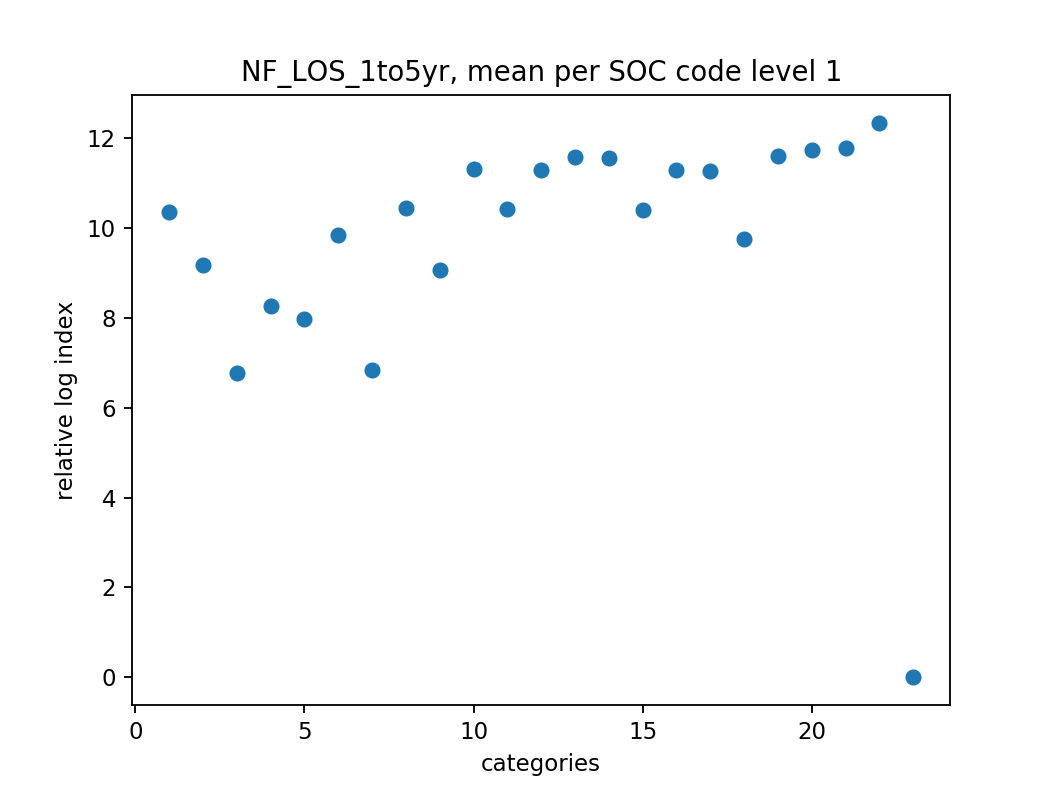

<IPython.core.display.Javascript object>


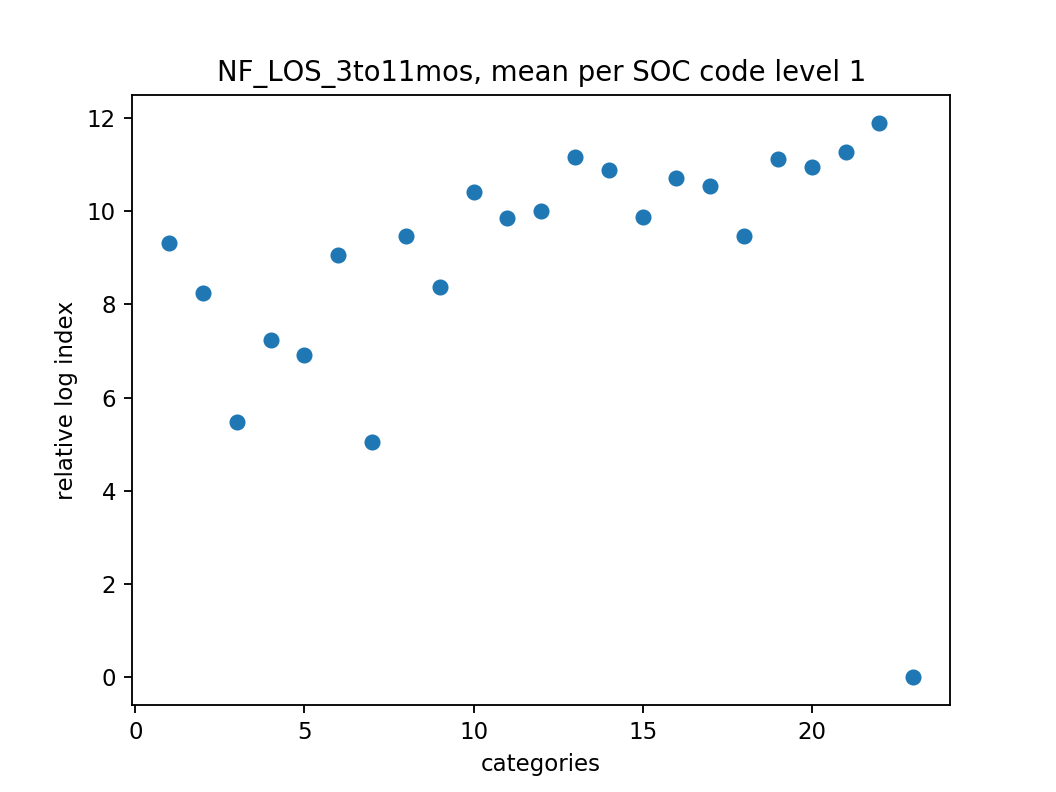

<IPython.core.display.Javascript object>


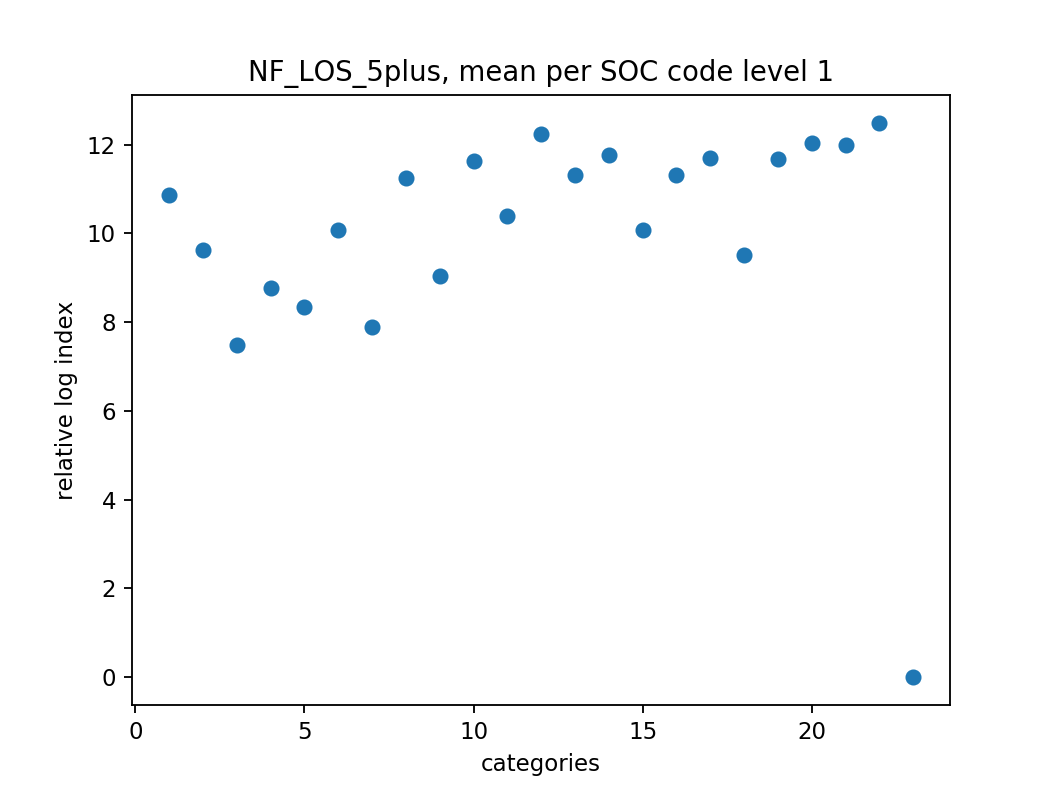

<IPython.core.display.Javascript object>


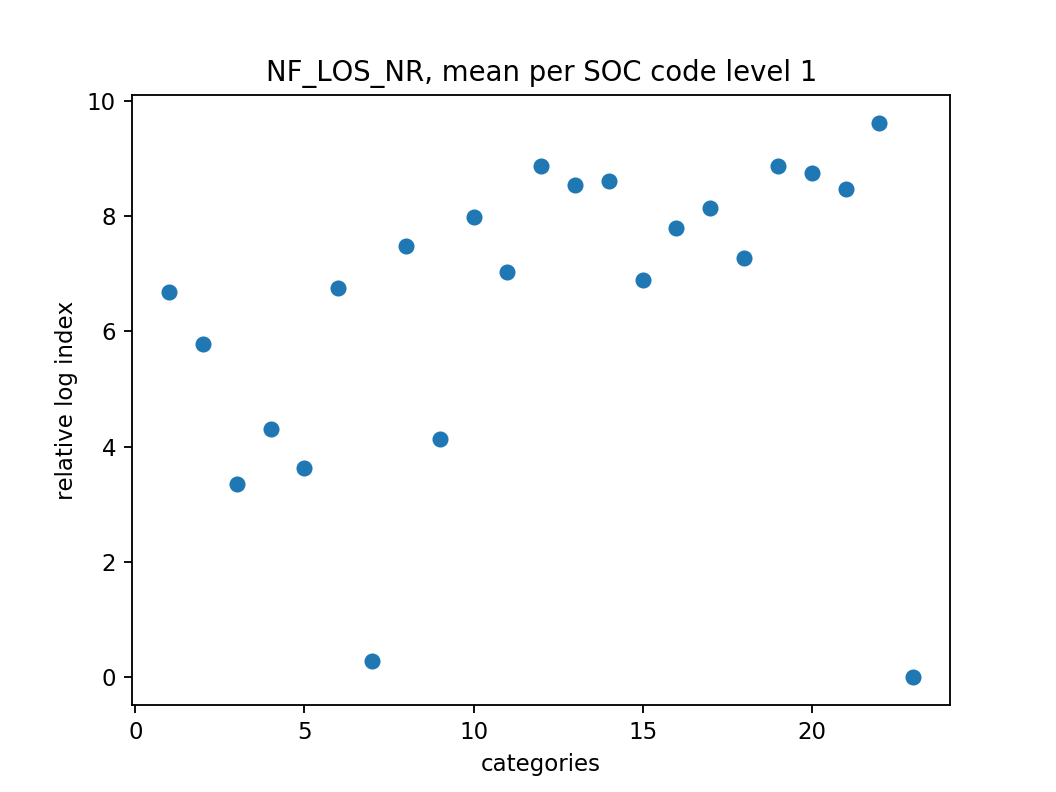

<IPython.core.display.Javascript object>


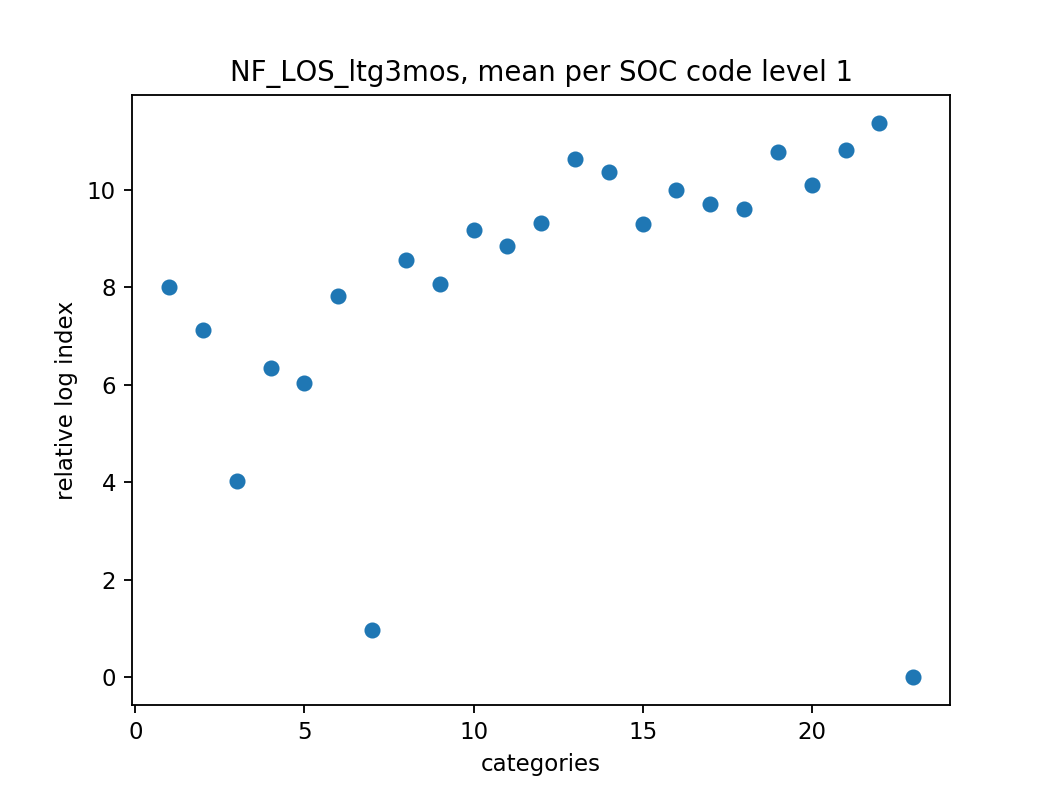

In [12]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018 
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level1_sockeys.keys():
        #print(index,db)
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)  
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+" - "+index,category,relative_totals)
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
    
    
    title = str(db) + ", mean per SOC code level 1"
    plt.figure(title)
    plt.title(title)
    plt.xlabel('categories')
    plt.ylabel('relative log index')
    plt.plot(x,y,'o')
    plt.show()

## Scatter plot level 6 RELATIVE average count of DATABASE data for soc groups

<IPython.core.display.Javascript object>


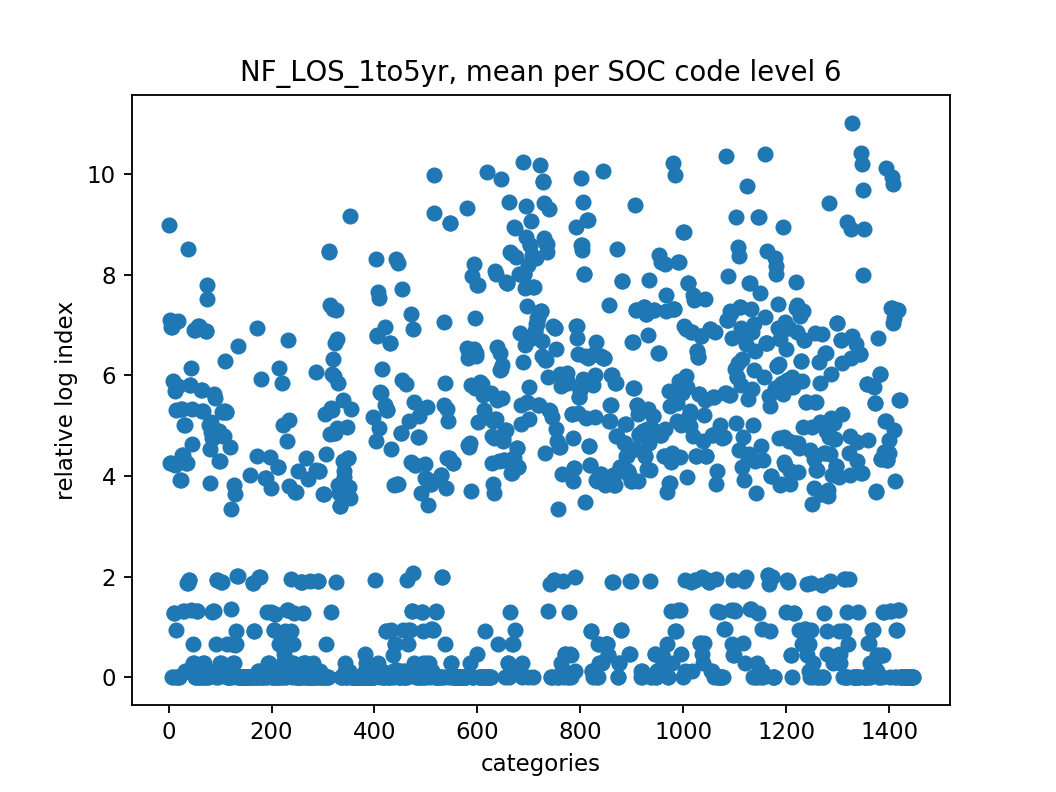

<IPython.core.display.Javascript object>


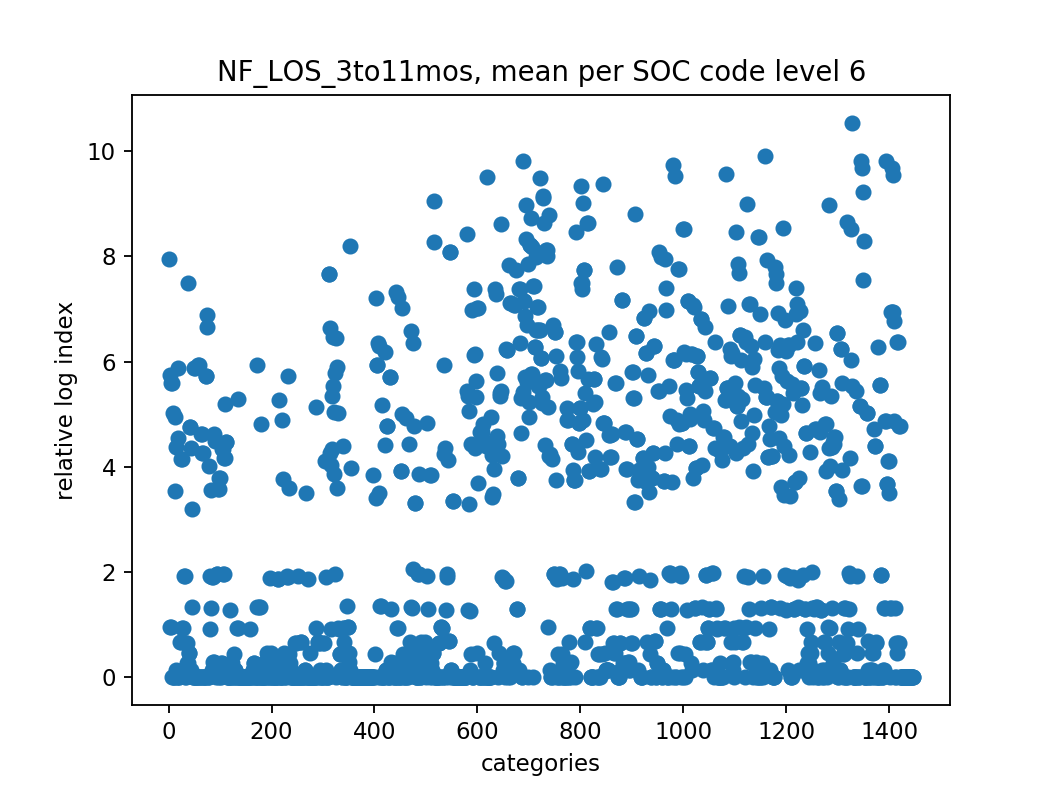

<IPython.core.display.Javascript object>


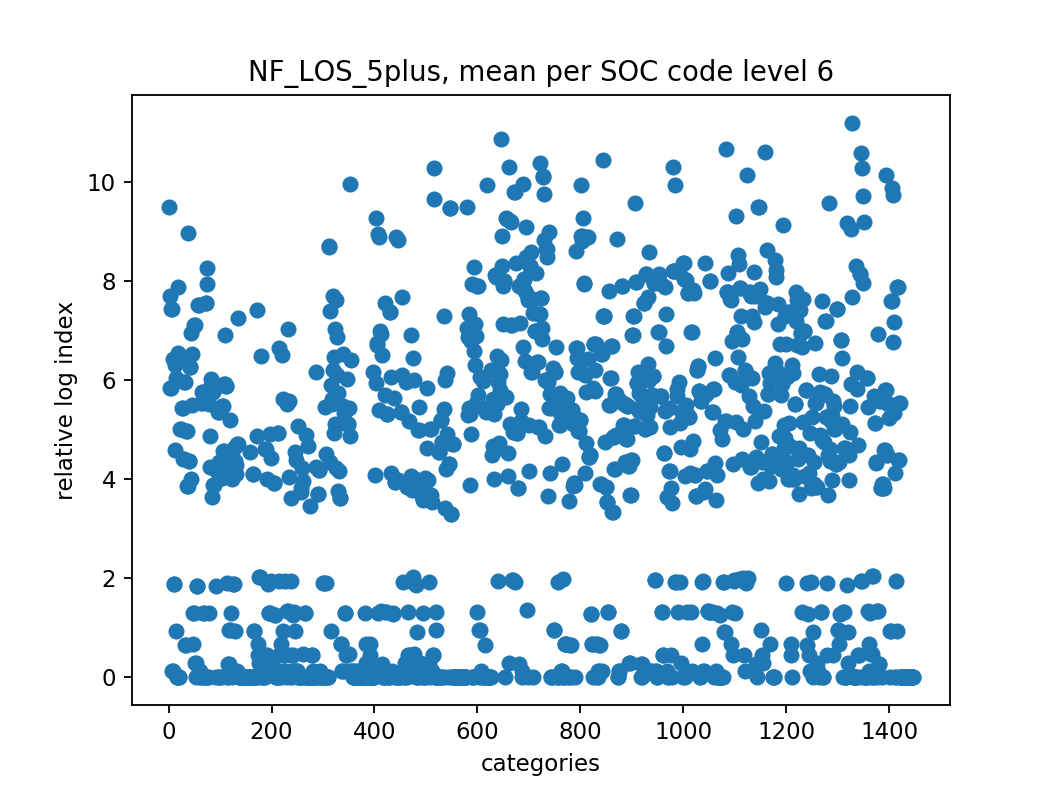

<IPython.core.display.Javascript object>


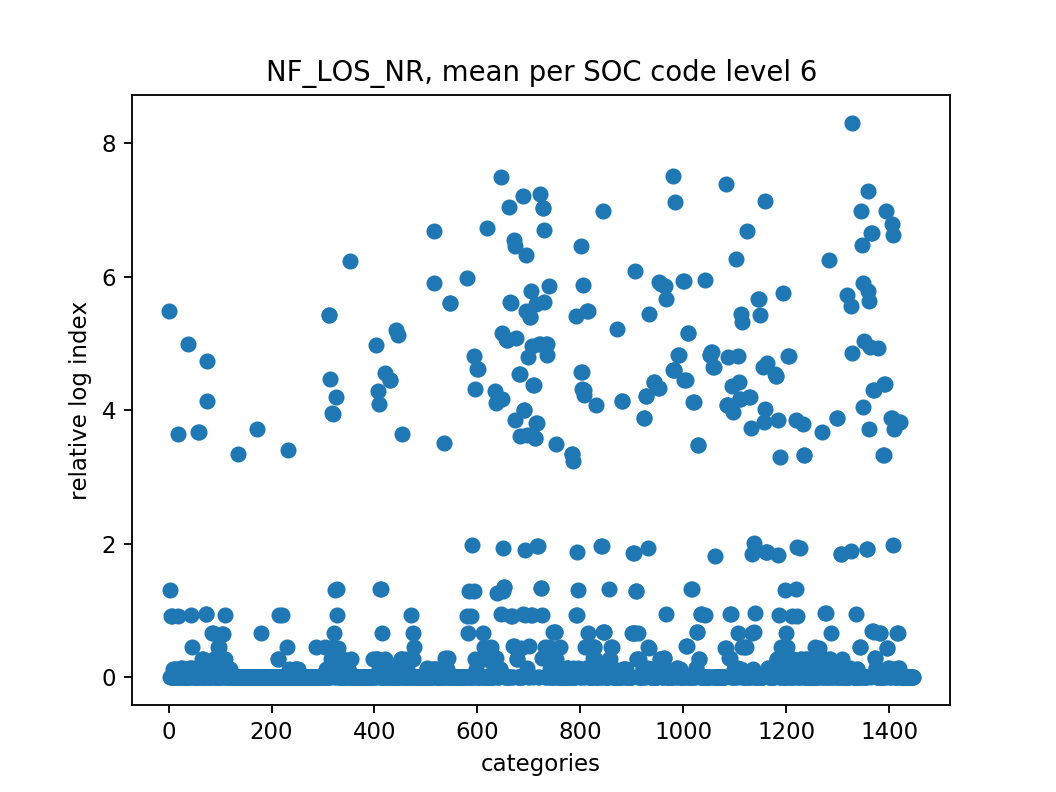

<IPython.core.display.Javascript object>


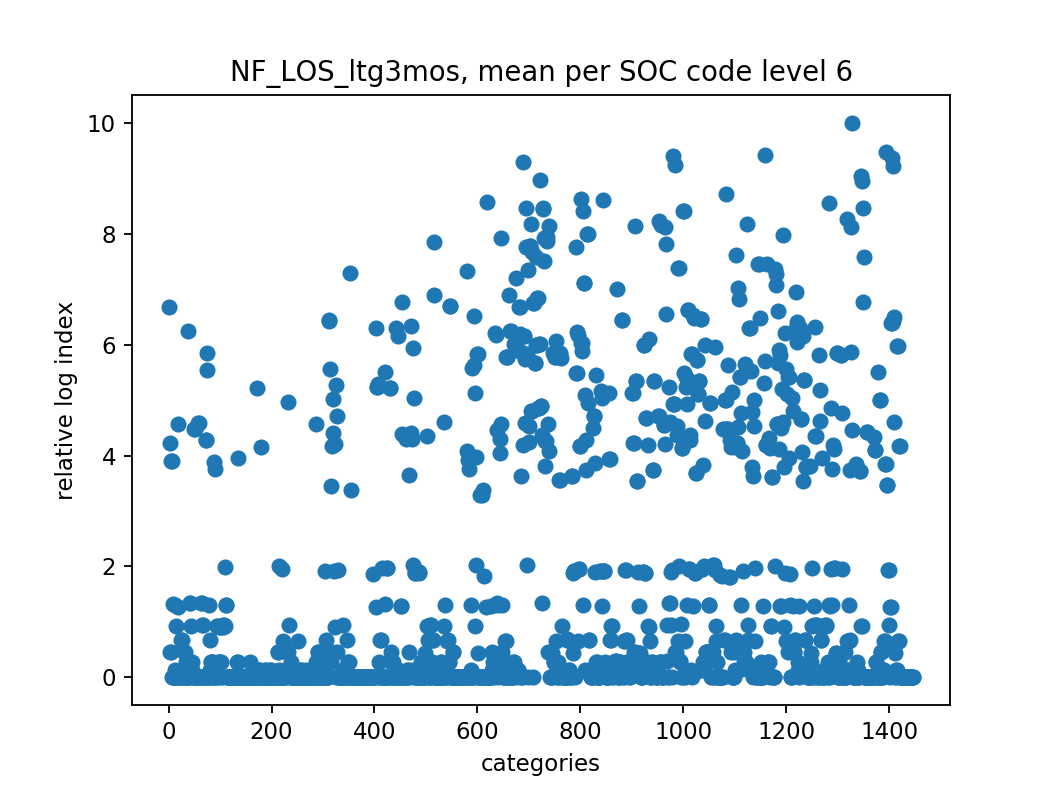

In [11]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level3_sockeys.keys():
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)    
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            
    title = str(db) + ", mean per SOC code level 6"
    plt.figure(title)
    plt.title(title)
    plt.xlabel('categories')
    plt.ylabel('relative log index')
    plt.plot(x,y,'o')
    plt.show()

In [26]:
#print(genericDB_files_dict.keys())